# AST 7939 Homework Assignment #1 (10 pts)

## All work is due Wednesday February 8 at 5 pm.

## Instruction: 
Do all homework in this Jupyter notebook and submit your final .ipynb file via Canvas. Show ALL your work and add comments to describe what your code does. 

You are encouraged to discuss homework problems with your classmates. However, your python script and answers to the questions must be written by yourself.

## 1. Curse of dimensionality (4 pts)

We learned that kNN suffers from the curse of dimensionality. In class, we estimated the size of a hypercube that includes $k$ nearest neighbors as a function of dimension and number of data points. In this homework, let's look into this problem in a more quantitative way by following the steps below. 

(a) Make six $D$-dimensional numpy arrays, where $D = 1, 2, 5, 10, 100,$ and $1000$. Each array contains $n=10^4$ data points that are randomly distributed in the $D$-dimensional space (hint: use np.random.rand). Let's assume that the side of each hypercube ranges from 0 to 1, so the volume of hypercubes is 1. (1 pt)


In [1]:
import numpy as np
n = 1e3
array1 = np.random.rand(int(n), 1)
array2 = np.random.rand(int(n), 2)
array5 = np.random.rand(int(n), 5)
array10 = np.random.rand(int(n), 10)
array100 = np.random.rand(int(n), 100)
array1000 = np.random.rand(int(n), 1000)
# print(array1)

(b) For each array, compute the distance between each data points. Since you have $10^4$ data points in each array, you need to compute distance total $(10,000 \times 9,999)/2 = 49,995,000$ times. There could be faster ways to do this computation, but I found ``distance_matrix`` from ``scipy.spatial`` does a decent job. Once you computed all the distance, normalize them by the maximum possible distance in each hypercube, that is $\sqrt{D}$. (1 pt)


In [2]:
array1.shape

(1000, 1)

In [3]:
# WARNING: took >7 minutes for n=1e4
from scipy.spatial import distance_matrix
dist1 = distance_matrix(array1, array1)/np.sqrt(1)
dist2 = distance_matrix(array2, array2)/np.sqrt(2)
dist5 = distance_matrix(array5, array5)/np.sqrt(5)
dist10 = distance_matrix(array10, array10)/np.sqrt(10)
dist100 = distance_matrix(array100, array100)/np.sqrt(100)
dist1000 = distance_matrix(array1000, array1000)/np.sqrt(1000)
dist1000.shape

(1000, 1000)

(c) In a single figure, plot six histograms (one for each array) showing the number of counts on the y axis vs. normalized distance between data points on the x axis. Make sure that your figure is readble. Also, label them properly so that readers can understand what the figure shows. (1 pt)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

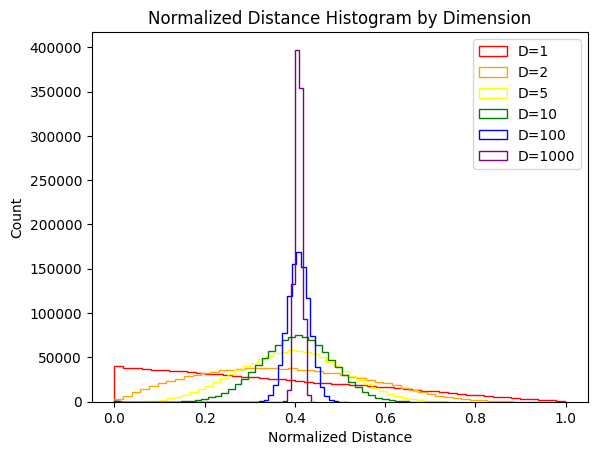

In [20]:
plt.hist(dist1.flatten(), bins=50, histtype='step', color='red', label='D=1')
plt.hist(dist2.flatten(), bins=50, histtype='step', color='orange', label='D=2')
plt.hist(dist5.flatten(), bins=50, histtype='step', color='yellow', label='D=5')
plt.hist(dist10.flatten(), bins=50, histtype='step', color='green', label='D=10')
plt.hist(dist100.flatten(), bins=50, histtype='step', color='blue', label='D=100')
plt.hist(dist1000.flatten(), bins=50, histtype='step', color='purple', label='D=1000')
plt.legend()
plt.xlabel('Normalized Distance')
plt.ylabel('Count')
plt.title('Normalized Distance Histogram by Dimension')
plt.show()

(d) Discuss what you see in the figure in the context of kNN. (1 pt)

As the dimensions increase, the mean normalized distance shifts from 0 toward about 0.4, the amplitude of the distribution tends to increase, and the standard deviation decreases. Specifically, as the standard deviation decreases, the distances between points varies less, so the nearest neighbor calculation becomes more meaningless. For example, if $k$=3, the fourth nearest neighbor is basically as close as the first three. When all of the points are the nearest neighbor, then none of them are.

-Rachel

## 2. Classifying objects in SDSS data using kNN and decision tree (6 pts)

SDSS.csv contains various information on 150,000 stars, galaxies, and quasars, including ugriz magnitudes and redshift. Let's build kNN and DT models based on this dataset. You may want to use pandas to read in the data (https://pandas.pydata.org/).

(a) Read in the data. Using the provided ugriz magnitudes, compute and store u-g, g-r, r-i, i-z colors for each object. (1 pt)

In [24]:
import pandas as pd
df = pd.read_csv('SDSS.csv')
df['u-g'] = df['u'] - df['g']
df['g-r'] = df['g'] - df['r']
df['r-i'] = df['r'] - df['i']
df['i-z'] = df['i'] - df['z']
df

,objid,ra,dec,u,g,r,i,z,run,rerun,...,specobjid,class,redshift,plate,mjd,fiberid,u-g,g-r,r-i,i-z
0,1237655107828973746,138.937318,49.779249,17.32152,16.28594,15.88471,15.66384,15.46604,2243,301,...,862475375345690624,GALAXY,0.028514,766,52247,131,1.03558,0.40123,0.22087,0.19780
1,1237678584114511952,31.594644,22.451246,18.13019,17.47997,16.97868,16.75768,16.83714,7709,301,...,2303710287351539712,QSO,1.694959,2046,53327,433,0.65022,0.50129,0.22100,-0.07946
2,1237680298881122360,333.991221,19.977552,18.94798,18.80473,18.75522,18.72968,18.66552,8108,301,...,8532228490187264000,QSO,2.046520,7578,56956,578,0.14325,0.04951,0.02554,0.06416
3,1237650761319514319,186.201096,-2.808180,19.22969,18.04638,17.37830,16.99285,16.76479,1231,301,...,376103378880587776,GALAXY,0.000000,334,51993,192,1.18331,0.66808,0.38545,0.22806
4,1237648722280317126,124.814240,0.651496,18.76061,17.28682,16.74055,16.55152,16.45902,756,301,...,2316149895234349056,STAR,0.000196,2057,53816,632,1.47379,0.54627,0.18903,0.09250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1237673758185554973,100.889697,29.106283,19.17071,18.21106,17.80099,17.63203,17.53079,6585,301,...,3013004977846118400,STAR,0.000160,2676,54179,352,0.95965,0.41007,0.16896,0.10124
149996,1237671262268752282,124.964450,9.635759,19.38253,17.49415,16.55436,16.13420,15.80408,6004,301,...,2728125362876737536,GALAXY,0.110984,2423,54149,254,1.88838,0.93979,0.42016,0.33012
149997,1237673756573762584,98.821075,26.946457,18.90948,17.73591,17.31252,17.16612,17.07103,6585,301,...,3035579600630474752,STAR,0.000097,2696,54167,558,1.17357,0.42339,0.14640,0.09509
149998,1237678877782966354,320.766012,9.993010,17.63177,16.10855,15.35884,15.21912,15.11279,7777,301,...,821986413082863616,STAR,-0.000218,730,52466,289,1.52322,0.74971,0.13972,0.10633


(b) Make kNN models. Vary $k$ from 1 to 30 and make a figure showing training/test accuracy vs. $k$. What is the optimal $k$ that results in the highest test accuracy? Use u, g, r, i, z magnitudes, u-g, g-r, r-i, i-z colors, and redshift as features -- so you have a 10-dimensional dataset. (1 pt)

In [58]:
SDSS_cols = ['class', 'u', 'g', 'r', 'i', 'z', 'u-g', 'g-r', 'r-i', 'i-z', 'redshift']
print(len(SDSS_cols))
df_SDSS = df[SDSS_cols]
y = df_SDSS.pop('class')
X = df_SDSS
y

11


0         GALAXY
1            QSO
2            QSO
3         GALAXY
4           STAR
           ...  
149995      STAR
149996    GALAXY
149997      STAR
149998      STAR
149999    GALAXY
Name: class, Length: 150000, dtype: object

In [59]:
# What the different classes are
print('No. of classes:', y.nunique())
print('Classes:', y.unique())

No. of classes: 3
Classes: ['GALAXY' 'QSO' 'STAR']


In [60]:
# Test train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn_test_scores = []
knn_train_scores = []
for k in range(1,16):
    # print(k)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    knn_test_scores.append(model.score(x_test, y_test))
    knn_train_scores.append(model.score(x_train, y_train))

knn_test_scores

[0.96568,
 0.9632533333333333,
 0.96864,
 0.9677866666666667,
 0.9677866666666667,
 0.9674133333333333,
 0.9669066666666667,
 0.9663733333333333,
 0.96592,
 0.9656,
 0.9649866666666667,
 0.96424,
 0.96352,
 0.9635733333333333,
 0.9625866666666667]

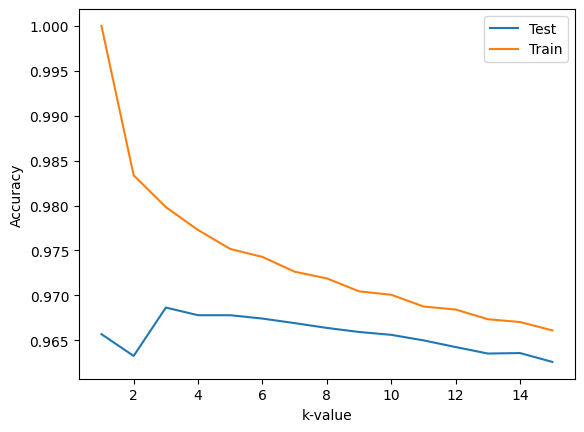

max test accuracy: 0.96864
k-value of max accuracy: 3


In [63]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(knn_test_scores)+1), knn_test_scores, label='Test')
plt.plot(range(1, len(knn_train_scores)+1), knn_train_scores, label='Train')
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print('max test accuracy:', max(knn_test_scores))
print('k-value of max accuracy:', knn_test_scores.index(max(knn_test_scores))+1) #

(c) Make DT models. Vary max_depth from 1 to 30 and make a figure showing training/test accuracy vs. max_depth. What is the optimal max_depth that results in the highest test accuracy? Again, use u, g, r, i, z magnitudes, u-g, g-r, r-i, i-z colors, and redshift as features.(1 pt)

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt_test_scores = []
dt_train_scores = []
for depth in range(1, 31):
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(x_train, y_train)
    dt_test_scores.append(model.score(x_test, y_test))
    dt_train_scores.append(model.score(x_train, y_train))

dt_test_scores

[0.6639466666666667,
 0.97304,
 0.9833066666666667,
 0.9833333333333333,
 0.9852,
 0.9864266666666667,
 0.9875733333333333,
 0.9876,
 0.988,
 0.98784,
 0.9881333333333333,
 0.9878666666666667,
 0.9878933333333333,
 0.98736,
 0.98688,
 0.9864533333333333,
 0.9864533333333333,
 0.9858666666666667,
 0.9858933333333333,
 0.9851466666666666,
 0.9841866666666667,
 0.9846133333333333,
 0.9844,
 0.98408,
 0.9843733333333333,
 0.9841333333333333,
 0.98376,
 0.9838933333333333,
 0.9833333333333333,
 0.9834666666666667]

Max test accuracy:  0.9881333333333333
depth-value for max test accuracy:  11


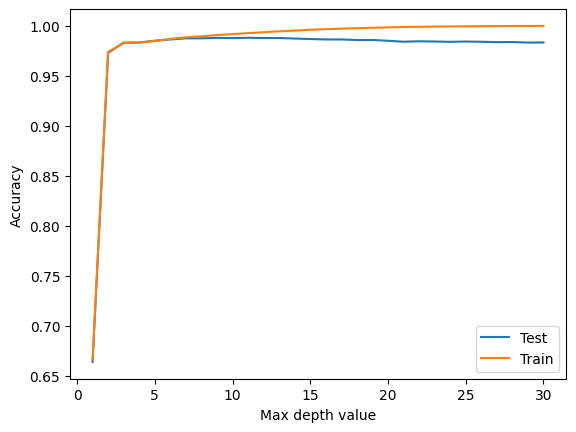

In [65]:
print("Max test accuracy: ", max(dt_test_scores))
print("depth-value for max test accuracy: ", dt_test_scores.index(max(dt_test_scores))+1)

plt.plot(range(1, len(dt_test_scores)+1), dt_test_scores, label='Test')
plt.plot(range(1, len(dt_train_scores)+1), dt_train_scores, label='Train')
plt.xlabel("Max depth value")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Rachel's note: While technically 11 is the "best" max_depth value, one can argue that the best practical max_depth value should be around 4. Beyond that, the model can overfit and be biased towards the training data. Introducing new data to test will likely be better with a lower max_depth value.

(d) For your best decision tree model, which features are the most important? (1 pt)

In [68]:
model = DecisionTreeClassifier(max_depth=11, random_state=0)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=0)

In [76]:
df_SDSS.columns.values

array(['u', 'g', 'r', 'i', 'z', 'u-g', 'g-r', 'r-i', 'i-z', 'redshift'],
      dtype=object)

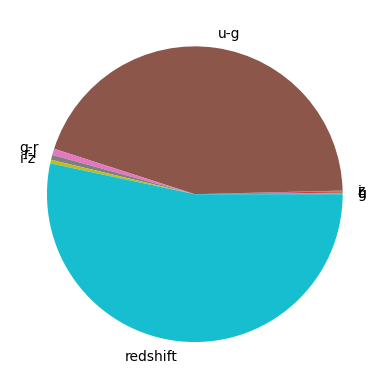

In [77]:
feat_import = model.feature_importances_
plt.pie(feat_import, labels=df_SDSS.columns.values)
plt.show()

In [79]:
for column, importance in zip(df_SDSS.columns, feat_import):
    print(column, importance)

u 0.0007113249339122596
g 0.0005823198942140424
r 0.00047542518178932466
i 0.0013211425420200367
z 0.0007871590519240588
u-g 0.44641728821880167
g-r 0.0069272349728155035
r-i 0.005372886663537364
i-z 0.003939071280538734
redshift 0.533466147260447


Redshift is the most important feature for differentiating between galaxies, stars, and QSO. The next most important feature is u-g color.

-Rachel

(e) SDSS_evaluation.csv contains another 150,000 stars, galaxies, and quasars. Using the best kNN and decision tree models you obtained, make predictions for this new dataset and compute the accuracy. (1 pt)

In [82]:
knn_model = KNeighborsClassifier(n_neighbors=3)
dt_model = DecisionTreeClassifier(max_depth=11, random_state=0)
knn_model.fit(X, y)
dt_model.fit(X, y)

DecisionTreeClassifier(max_depth=11, random_state=0)

In [83]:
df_SDSS

,u,g,r,i,z,u-g,g-r,r-i,i-z,redshift
0,17.32152,16.28594,15.88471,15.66384,15.46604,1.03558,0.40123,0.22087,0.19780,0.028514
1,18.13019,17.47997,16.97868,16.75768,16.83714,0.65022,0.50129,0.22100,-0.07946,1.694959
2,18.94798,18.80473,18.75522,18.72968,18.66552,0.14325,0.04951,0.02554,0.06416,2.046520
3,19.22969,18.04638,17.37830,16.99285,16.76479,1.18331,0.66808,0.38545,0.22806,0.000000
4,18.76061,17.28682,16.74055,16.55152,16.45902,1.47379,0.54627,0.18903,0.09250,0.000196
...,...,...,...,...,...,...,...,...,...,...
149995,19.17071,18.21106,17.80099,17.63203,17.53079,0.95965,0.41007,0.16896,0.10124,0.000160
149996,19.38253,17.49415,16.55436,16.13420,15.80408,1.88838,0.93979,0.42016,0.33012,0.110984
149997,18.90948,17.73591,17.31252,17.16612,17.07103,1.17357,0.42339,0.14640,0.09509,0.000097
149998,17.63177,16.10855,15.35884,15.21912,15.11279,1.52322,0.74971,0.13972,0.10633,-0.000218


In [94]:
df_eval = pd.read_csv('SDSS_evaluation.csv')
df_eval['u-g'] = df_eval['u'] - df_eval['g']
df_eval['g-r'] = df_eval['g'] - df_eval['r']
df_eval['r-i'] = df_eval['r'] - df_eval['i']
df_eval['i-z'] = df_eval['i'] - df_eval['z']
df_eval

,objid,ra,dec,u,g,r,i,z,run,rerun,...,specobjid,class,redshift,plate,mjd,fiberid,u-g,g-r,r-i,i-z
0,1237666210854536279,267.693275,25.382464,21.43812,20.14254,19.53728,19.27723,19.11268,4828,301,...,2470235456227272704,STAR,-0.000848,2194,53904,40,1.29558,0.60526,0.26005,0.16455
1,1237661958293029652,195.497352,51.631548,23.92653,22.86720,21.38509,20.37984,19.71321,3838,301,...,9258422668042194944,GALAXY,0.645810,8223,57429,537,1.05933,1.48211,1.00525,0.66663
2,1237660961328399002,137.277106,33.357736,21.32821,21.11290,19.40331,18.65184,18.21766,3606,301,...,6542733657546969088,QSO,1.788380,5811,56334,470,0.21531,1.70959,0.75147,0.43418
3,1237678858479272458,17.874748,11.723564,22.02962,21.37774,21.52691,21.45392,20.66333,7773,301,...,5254744288475238400,QSO,2.134945,4667,55868,616,0.65188,-0.14917,0.07299,0.79059
4,1237680272040461216,343.158072,20.848515,22.80926,22.97740,21.88842,20.83235,20.04866,8102,301,...,8567048099343912960,GALAXY,0.730557,7609,56959,275,-0.16814,1.08898,1.05607,0.78369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1237678879951159742,9.766930,-3.015522,23.65226,21.61961,20.13433,19.37306,18.93905,7778,301,...,4919149974368047104,GALAXY,0.510960,4369,55827,339,2.03265,1.48528,0.76127,0.43401
149996,1237678879959089467,27.855484,-2.793334,22.06322,22.34275,20.57937,19.61827,18.98400,7778,301,...,4895474185990852608,GALAXY,0.536282,4348,55559,223,-0.27953,1.76338,0.96110,0.63427
149997,1237655109452955889,190.707871,60.870616,24.53051,21.30150,19.53934,18.75113,18.30253,2243,301,...,7701346515105894400,GALAXY,0.456249,6840,56685,695,3.22901,1.76216,0.78821,0.44860
149998,1237667731809632287,132.411868,14.917552,19.19523,18.88476,18.85863,18.95066,18.98802,5182,301,...,2737136404868917248,STAR,0.000181,2431,53818,268,0.31047,0.02613,-0.09203,-0.03736


In [98]:
df_SDSSeval = df_eval[SDSS_cols]
y_eval = df_SDSSeval.pop('class')
x_eval = df_SDSSeval
x_eval

,u,g,r,i,z,u-g,g-r,r-i,i-z,redshift
0,21.43812,20.14254,19.53728,19.27723,19.11268,1.29558,0.60526,0.26005,0.16455,-0.000848
1,23.92653,22.86720,21.38509,20.37984,19.71321,1.05933,1.48211,1.00525,0.66663,0.645810
2,21.32821,21.11290,19.40331,18.65184,18.21766,0.21531,1.70959,0.75147,0.43418,1.788380
3,22.02962,21.37774,21.52691,21.45392,20.66333,0.65188,-0.14917,0.07299,0.79059,2.134945
4,22.80926,22.97740,21.88842,20.83235,20.04866,-0.16814,1.08898,1.05607,0.78369,0.730557
...,...,...,...,...,...,...,...,...,...,...
149995,23.65226,21.61961,20.13433,19.37306,18.93905,2.03265,1.48528,0.76127,0.43401,0.510960
149996,22.06322,22.34275,20.57937,19.61827,18.98400,-0.27953,1.76338,0.96110,0.63427,0.536282
149997,24.53051,21.30150,19.53934,18.75113,18.30253,3.22901,1.76216,0.78821,0.44860,0.456249
149998,19.19523,18.88476,18.85863,18.95066,18.98802,0.31047,0.02613,-0.09203,-0.03736,0.000181


In [101]:
ypred_knn = knn_model.predict(x_eval)
ypred_dt = dt_model.predict(x_eval)

In [102]:
print('KNN prediction: ', ypred_knn)
print("DT prediction: ", ypred_dt)

KNN prediction:  ['GALAXY' 'QSO' 'QSO' ... 'QSO' 'STAR' 'GALAXY']
DT prediction:  ['STAR' 'QSO' 'GALAXY' ... 'QSO' 'STAR' 'STAR']


In [103]:
knn_eval_score = knn_model.score(x_eval, y_eval)
dt_eval_score = dt_model.score(x_eval, y_eval)

In [104]:
print("KNN Accuracy", knn_eval_score)
print("DT Accuracy: ", dt_eval_score)

KNN Accuracy 0.56892
DT Accuracy:  0.7017333333333333


(f) You should have gotten poor performance from your kNN and decision tree models unless you did some magic. Have a look at the your training/evaluation datasets and discuss what might have caused the poor performace. (1 pt)

In [113]:
print('Relative frequence of classes in SDSS (original)', y.value_counts(normalize=True))
print('Relative frequency of classes in SDSS evaluation', y_eval.value_counts(normalize=True))

Relative frequence of classes in SDSS (original) class
GALAXY    0.333333
QSO       0.333333
STAR      0.333333
Name: proportion, dtype: float64
Relative frequency of classes in SDSS evaluation class
GALAXY    0.575487
STAR      0.220567
QSO       0.203947
Name: proportion, dtype: float64


In [111]:
X.describe()

,u,g,r,i,z,u-g,g-r,r-i,i-z,redshift
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,18.702499,17.728709,17.305581,17.093037,16.965409,0.973790,0.423128,0.212544,0.127628,0.438191
std,0.798971,1.081047,1.269391,1.355512,1.427793,0.631263,0.353004,0.258654,0.266496,0.695582
min,10.611810,9.300097,8.814259,8.667918,8.947795,-3.984730,-14.784580,-15.859360,-13.162490,-0.004268
25%,18.322070,17.074550,16.431960,16.111648,15.901628,0.320010,0.194138,0.107370,0.025380,0.000073
50%,18.936885,17.814610,17.325140,17.071945,16.941445,1.054745,0.397480,0.211520,0.108885,0.072395
75%,19.302513,18.545488,18.343940,18.241312,18.165257,1.425502,0.658243,0.364180,0.242490,0.715518
max,19.600000,19.996050,31.990100,32.141470,29.383740,4.986330,4.405280,10.730430,16.548340,7.011245


In [112]:
x_eval.describe()

,u,g,r,i,z,u-g,g-r,r-i,i-z,redshift
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,21.644338,20.417033,19.511881,18.999241,18.707471,1.227305,0.905152,0.512641,0.291770,0.575036
std,1.911476,1.977128,1.860274,1.789266,1.808842,0.919834,0.679150,0.459824,0.391776,0.741393
min,15.075110,15.001870,12.520460,11.847220,11.956510,-4.904950,-12.318610,-14.649070,-13.162490,-0.009971
25%,20.161220,18.719590,17.852895,17.461927,17.218663,0.543818,0.344463,0.197027,0.117560,0.048007
50%,21.870550,20.834625,19.931785,19.293620,18.925105,1.196970,0.839610,0.444660,0.321495,0.366401
75%,23.140193,21.949587,20.964343,20.382017,19.971673,1.851200,1.481190,0.808102,0.445443,0.725850
max,24.999840,24.999830,29.571860,32.141470,29.383740,9.379830,7.940000,10.730430,11.864040,7.021413


The training data had an even split between the three classes of objects (galaxy, star, and QSO), while the evaluation data leaned heavily towards galaxy data. In fact, if the KNN model had predicted "GALAXY" for each data point, it would have done slightly better (~57.5% accuracy if all GALAXY vs. ~56.9% accuracy). Additionally, the mean and standard deviation of the two most important features (redshift and u-g) increased from the training data to the evaluation data. Overall, the evaluation data statistical properties varied significantly from those of the training data.

-Rachel